In [1]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/09_annealing_brush/py_files')
import subprocess
import sys
import os
import pandas as pd
import numpy as np

from annealing_utils import anion_brush
from annealing_utils import cation_brush
from create_in import files_pro_anneal
from read_pro import out_reader
import matplotlib.pyplot as plt

In [2]:
N = 300

S = 150

pK_brush = 5.5
Cs = 0.001
delta_pH_brush = 0.5
chi_solvent = 0.5
chi_surface = -0.55

In [3]:
file_name_pro = files_pro_anneal(
    way = "/home/tpopova/prj/PB_SCF/09_annealing_brush/scf_templates/",
    template_name_anion = "annealing_anion_brush_temp.in",
    
    range_param = "dpK",
    min_range_value = 4,
    max_range_value = 4,
    
    N_brush = N,
    S = S,
    pK_brush = pK_brush,
    Cs = Cs,
    delta_pH_brush = delta_pH_brush,
    chi_solvent = chi_solvent,
    chi_surface = chi_surface,
    type_brush = 'anion'
)

psi, phi_brush = out_reader(file_names = file_name_pro)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
0 iterations to find alphabulk values. 
NEWTON has been notified.
Your guess:it =  0  E = 2.890087e+00 |g| = 9.255092e+00 alpha = 1.000000e+00 
hessian scaling: 2.35394
it =  1  E = 2.521934e+00 |g| = 7.752093e+00 alpha = 1.108049e-01 
it =  2  E = 2.233129e+00 |g| = 9.047520e+00 alpha = 1.551082e-01 
it =  3  E = 7.539984e+00 |g| = 1.021662e+01 alpha = 1.660388e-02 
it =  4  E = 1.635176e+01 |g| = 9.548811e+00 alpha = 3.408228e-03 
it =  5  E = 5.643875e+00 |g| = 9.729913e+00 alpha = 2.790072e-02 
it =  6  E = 6.572201e+00 |g| = 9.795701e+00 alpha = 1.929224e-02 
it =  7  E = 6.307625e+00 |g| = 9.027742e+00 alpha = 1.795618e-02 
it =  8  E = 1.308517e+01 |g| = 9.098362e+00 alpha = 3.901622e-03 
it =  9  E = 4.968898e+00 |g| = 8.580595e+00 alpha = 2.381345e-02 
it = 

In [4]:
file_name_pro_cat = files_pro_anneal(
    way = "/home/tpopova/prj/PB_SCF/09_annealing_brush/scf_templates/",
    template_name_anion = "annealing_cation_brush_temp.in",
    
    range_param = "dpK",
    min_range_value = 4,
    max_range_value = 4,
    
    N_brush = N,
    S = S,
    pK_brush = pK_brush,
    Cs = Cs,
    delta_pH_brush = -delta_pH_brush,
    chi_solvent = chi_solvent,
    chi_surface = chi_surface,
    type_brush = 'cation'
)

psi_cat, phi_brush_cat = out_reader(file_names = file_name_pro_cat)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
0 iterations to find alphabulk values. 
NEWTON has been notified.
Your guess:it =  0  E = 2.888375e+00 |g| = 9.245101e+00 alpha = 1.000000e+00 
hessian scaling: 2.3572
it =  1  E = 2.520310e+00 |g| = 7.742929e+00 alpha = 1.108165e-01 
it =  2  E = 2.230042e+00 |g| = 9.037599e+00 alpha = 1.553686e-01 
it =  3  E = 7.518769e+00 |g| = 1.020521e+01 alpha = 1.667991e-02 
it =  4  E = 1.631020e+01 |g| = 9.538423e+00 alpha = 3.422118e-03 
it =  5  E = 5.635766e+00 |g| = 9.719474e+00 alpha = 2.795363e-02 
it =  6  E = 6.576273e+00 |g| = 9.784363e+00 alpha = 1.924774e-02 
it =  7  E = 6.315106e+00 |g| = 9.016133e+00 alpha = 1.789172e-02 
it =  8  E = 1.307223e+01 |g| = 9.088090e+00 alpha = 3.905148e-03 
it =  9  E = 4.966370e+00 |g| = 8.568874e+00 alpha = 2.380625e-02 
it =  

In [5]:
pI, pH_b, H, alpha_z_mean, z_in_range, z_out_range, c_polymer, alpha_z,\
        psi_in, psi_out, psi_in_zero, psi_in_H_value = anion_brush(
    Cs = Cs,
    f_plus = 0.5,
    pK_minus = 5,
    pK_plus = 5,
    pK_brush = pK_brush,
    delta_pH_prot = None, 
    delta_pH_brush = delta_pH_brush,
    lb = 1.0,
    a = 1.0,
    
    N = N,
    S = S,
    
)

In [6]:
pI_prot_cation, pH_b_cation, H_cat, alpha_z_mean_cat, z_in_range_cat,\
        z_out_range_cat, c_polymer_cat, alpha_z_cat, psi_in_cat, psi_out_cat,\
        psi_in_zero_cat,psi_in_H_value_cat = cation_brush(
    Cs = Cs,
    f_plus = 0.5,
    pK_minus = 5,
    pK_plus = 5,
    pK_brush = pK_brush,
    delta_pH_prot = None, 
    delta_pH_brush = -delta_pH_brush,
    lb = 1.0,
    a = 1.0,
    
    N = N,
    S = S)

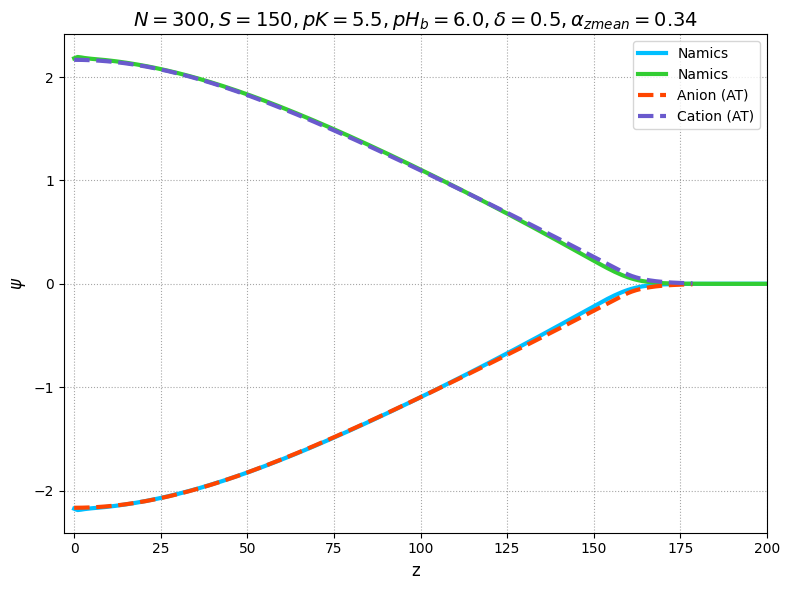

In [10]:
# Построение графика
plt.figure(figsize=(8, 6))

# Симуляция (Namics)
plt.plot(psi, label="Namics", color='deepskyblue', linestyle='-', linewidth=3)

plt.plot(psi_cat, label="Namics", color='limegreen', linestyle='-', linewidth=3)

# Аналитическая теория (AT)
plt.plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), 
         label="Anion (AT)", color='orangered', linestyle='--', linewidth=3)

plt.plot(np.hstack((z_in_range_cat, z_out_range_cat)), np.hstack((psi_in_cat, psi_out_cat)), 
         label="Cation (AT)", color='slateblue', linestyle='--', linewidth=3)



plt.xlim(-3, 200)

# Добавление сетки
plt.grid(True, linestyle=':', color='gray', alpha=0.7)

# Подписи к осям
plt.xlabel('z', fontsize=12)
plt.ylabel('$\\psi$', fontsize=12)

# Заголовок графика
plt.title(f'$N = {N}, S = {S}, pK = {pK_brush}, pH_b = {pH_b}, \\delta = {delta_pH_brush}, \\alpha_{{z mean}} = {alpha_z_mean:.2f}$', fontsize=14)

# Легенда
plt.legend()

# Показать график
plt.tight_layout()
plt.show()

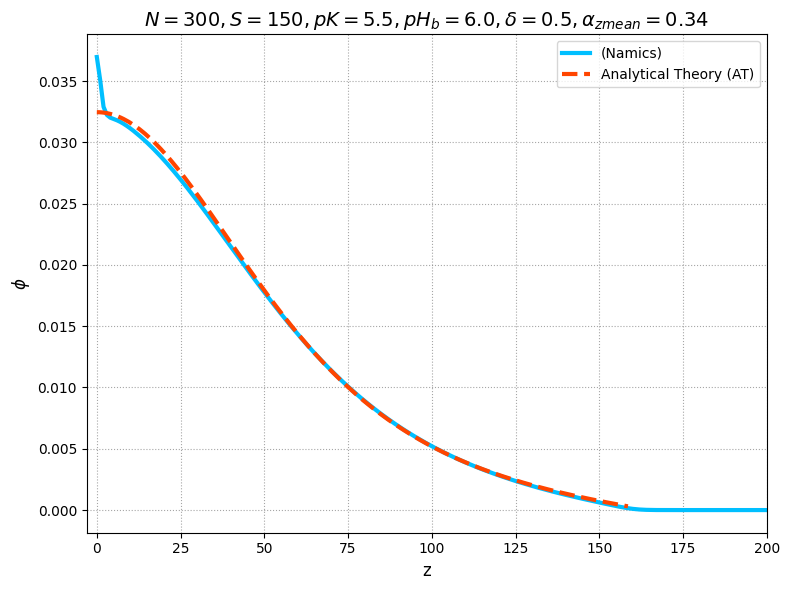

In [13]:
# Построение графика
plt.figure(figsize=(8, 6))

# Симуляция (Namics)
plt.plot(phi_brush, label="(Namics)", color='deepskyblue', linestyle='-', linewidth=3)

# Аналитическая теория (AT)
plt.plot(z_in_range, c_polymer, 
         label="Analytical Theory (AT)", color='orangered', linestyle='--', linewidth=3)

plt.xlim(-3, 200)

# Добавление сетки
plt.grid(True, linestyle=':', color='gray', alpha=0.7)

# Подписи к осям
plt.xlabel('z', fontsize=12)
plt.ylabel('$\\phi$', fontsize=12)

# Заголовок графика
plt.title(f'$N = {N}, S = {S}, pK = {pK_brush}, pH_b = {pH_b}, \\delta = {delta_pH_brush}, \\alpha_{{z mean}} = {alpha_z_mean:.2f}$', fontsize=14)

# Легенда
plt.legend()

# Показать график
plt.tight_layout()
plt.show()